Quesition 1. Data: http://www.buffalo.edu/ ̃erikeina/MDI505/specific-heat-and-atomic-mass-metals.csv
The data file provided lists room temperature experimental specific heat capacity cs of 22 metals and their atomic masses Mat. The specific heat capacity is related to the
molar heat capacity Cm by the equation cs = Cm Mat
Plot cs vs 1/Mat and find the best-fit line. The plot can be linear or log-log (to avoid clustering). What is the slope of this fitted line? Based on the Dulong–Petit rule, is this value expected?


loading data of Question 1

In [6]:
# -*- coding:utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = np.loadtxt('specific_heat_and_atomic_mass_metals.txt')

x = data[:,0]
y = data[:,1]

 find the best-fit line: do linear regression, we can get the slope of this fitted line here

In [7]:
x = 1/x
b = np.ones(len(x))
x1 = np.vstack([x, b]).T
theta = np.linalg.lstsq(x1, y, rcond=None)[0]
print(theta)

[2.50063343e+01 7.41360635e-03]


here the we can get the slope of fitted line: 2.50063343e+01, and based on the Dulong–Petit rule, this value is expected

Next step: Plot cs vs 1/Mat, including linear and log-log (to avoid clustering)and their fitted line

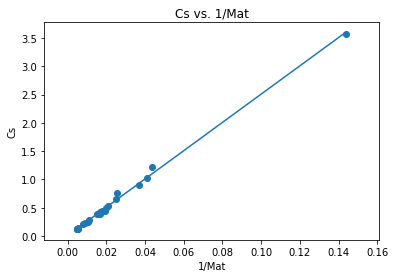

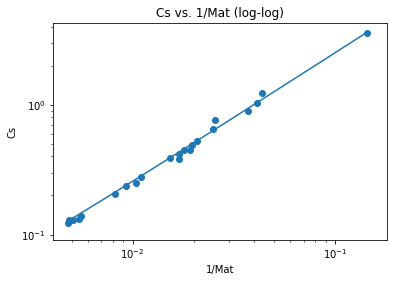

In [8]:
x2 = np.arange(0.004784918, 0.144092219, 0.001)
y2 = theta[0] * x2 + theta[1]

plt.scatter(x, y)
plt.xlabel('1/Mat')
plt.ylabel('Cs')

plt.plot(x2, y2)
plt.xlabel('1/Mat')
plt.ylabel('Cs')
plt.title('Cs vs. 1/Mat')
plt.show()

plt.figure()
plt.scatter(x, y)
plt.xlabel('1/Mat')
plt.xscale('log')
plt.ylabel('Cs')
plt.yscale('log')

plt.plot(x2, y2)
plt.xlabel('1/Mat')
plt.ylabel('Cs')
plt.title('Cs vs. 1/Mat (log-log)')
plt.show()


Now consider Be, which is a very light metal. It has cs = 1.825 J g−1 K−1 and Mat = 9.012 g mol−1. What is its molar heat capacity Cm? How does the value for Be fit the rest of the data?

Answer: Cm = Cs * Mat =16.4469 J/K mol, this data shows relatively large error compared with the fitted slope(25).

Quesition 2. Data: http://www.acsu.buffalo.edu/ ̃erikeina/MDI505/Sr-resistivity-vs-temp.txt Consider the resistivity ρ of strontium (Sr), which is given at different temperatures T
in the tab-delimited data file.
Given the relation ρ ∝ Tn, plot ρ against T on a log–log plot and find n.

loading data of Question 2

In [9]:
# -*- coding:utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('Sr_resistivity_vs_temp.txt')

T = data[:,0]
Rho = data[:,1]

plot ρ against T on a log–log plot

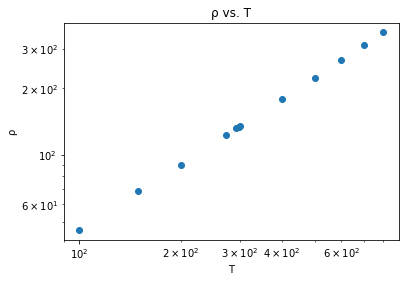

In [17]:
plt.figure()
plt.scatter(T, Rho)
plt.xlabel('T')
plt.xscale('log')
plt.ylabel('ρ')
plt.yscale('log')
plt.title('ρ vs. T')
plt.show()

find n

In [11]:
x = np.log(T)
y = np.log(Rho)

b = np.ones(len(x))
x1 = np.vstack([x, b]).T
theta = np.linalg.lstsq(x1, y, rcond=None)[0]
print(theta)

[ 0.98465151 -0.71132014]


here n=0.98465151

To confirm if the n is well fitted, the plot of fitted line was shown below

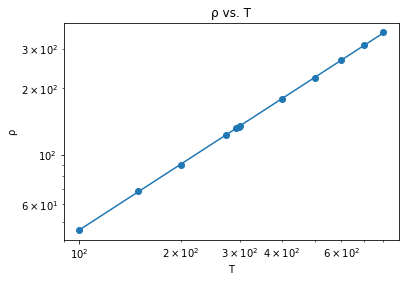

In [16]:
x2 = np.arange(100, 800, 1)
y1 = theta[0] * np.log(x2) + theta[1]
y2 = np.exp(y1)

plt.figure()
plt.scatter(T, Rho)
plt.xlabel('T')
plt.xscale('log')
plt.ylabel('ρ')
plt.yscale('log')
plt.title('ρ vs. T')

plt.plot(x2, y2)
plt.show()

    Here we can see it is well fitted

Question 3. Data: http://www.acsu.buffalo.edu/ ̃erikeina/MDI505/Cu-Zn-alloy-Nordheim.csv
The data table shows some typical resistivity values for various Cu–Zn compositions
in which the alloy is a solid solution (up to 30% Zn).
Given the resistivity of the alloy to be ρalloy = CX(1 − X), determine the effective Nordheim coefficient C for Zn dissolved in Cu over this compositional range.

loading data of Question 3

In [18]:
# -*- coding:utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('Cu_Zn_alloy_Nordheim.txt')

x = data[:,0]/100
Rho = data[:,1]

Calculate C

In [19]:
x1 = x * (1-x)

b = np.ones(len(x1))
x2 = np.vstack([x1, b]).T
theta = np.linalg.lstsq(x2, Rho, rcond=None)[0]
print(theta)

[225.80726339  18.51543768]


Here the C = 225.80726339

To confirm if the C is well fitted, the plot of fitted line was shown below

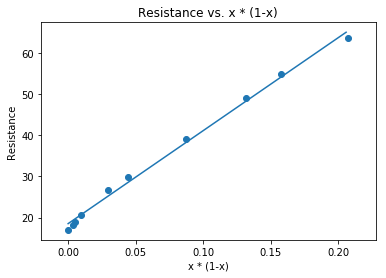

In [21]:
x3 = np.arange(0, 0.3, 0.01)
x3 = x3 * (1-x3)
y3 = theta[0] * x3 + theta[1]

plt.scatter(x1, Rho)
plt.xlabel('x * (1-x)')
plt.ylabel('Resistance')
plt.title('Resistance vs. x * (1-x)')
plt.plot(x3, y3)
plt.show()

    Here we can see it is well fitted

Done